Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
tSZ Signal: 8.165958338471733e-06


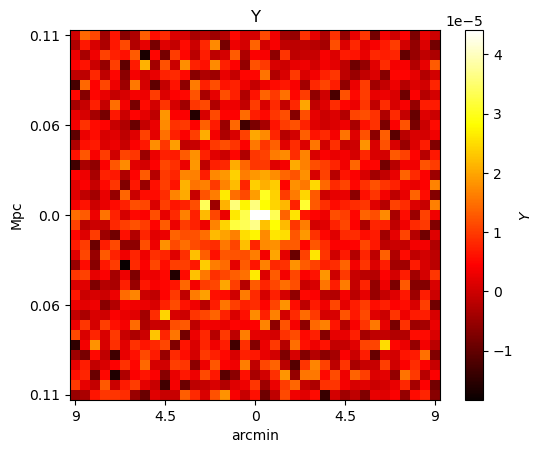

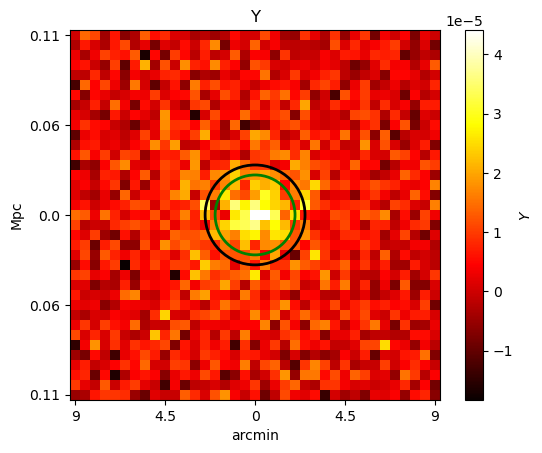

In [1]:
import simulation as sim
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

#Load Cosmology
omega_m0, omega_b0, cosmo_h, sigma8, ns = sim.cosmo_para()

#Prepare directory to store simulated images
cwd = os.getcwd()
directory = 'test'
path = os.path.join(cwd, directory)
shutil.rmtree(path)
os.mkdir(path)

#Select options for images
# nums = np.arange(9) + 1
nums = [8,9]

#Input Mass and Redshift
Mass = [5]
z = [0.01]

#Select Telescope and Observation Frequency
tele = 'SPT'
f = 150

#Retrieve Observation-related Parameters
beam_size, noise_level = sim.tele_para(tele, f)

#Converting to correct scale
f *= 1e9

for i in range(np.size(Mass)):
    
    Mass[i] *= 1e13
    radius = np.linspace(0.1, 9, 10)     #arcmin
    new_r = sim.arcmin_to_Mpc(radius, z[i])
    battaglia_pro = np.array([sim.battaglia_profile(r, Mass[i], z[i]) for r in new_r])
    y_pro = sim.epp_to_y(battaglia_pro)
    
    abs_path = os.path.join(path, str(i))
    sim.generate_img(radius, y_pro, f, noise_level, beam_size, z[i], nums, p = abs_path, AP = True)
    
#     Map = sim.generate_img(radius, y_pro, f, noise_level, beam_size, z[i], AP = True)
#     tsz_sig = sim.tSZ_signal(Map)
#     print("tSZ signal through apeture photometry: " + str(tsz_sig))
    
#     for j in range(np.size(num)):
        
#         img = str(i)+str(num[j])+'.png'
#         abs_path = os.path.join(path, img)
#         sim.generate_img(radius, y_pro, f, noise_level, beam_size, z[i], option = num[j], p = abs_path)